In [2]:
#venv toxic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train_data.csv')
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
82955,82955,140566,140567,How do I make money making websites?,How can I make money on my websites?,0
105466,105466,173916,173917,How can I stop fearing loss?,How can you stop fear?,0
258658,258658,26117,104738,Is energy in vacuum real? How do we know that ...,Do virtual particles and energy in vacuum real...,1
345310,345310,473596,134581,Why are there so many questions exclusively ab...,Why are there so many questions exclusively ab...,0
3614,3614,7161,7162,How do I upgrade the Intex Aqua Power to Lolipop?,The volume down+power key is not working in my...,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df['question1'][0], df['question2'][0]

('What is the step by step guide to invest in share market in india?',
 'What is the step by step guide to invest in share market?')

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [10]:
(df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

<AxesSubplot: >

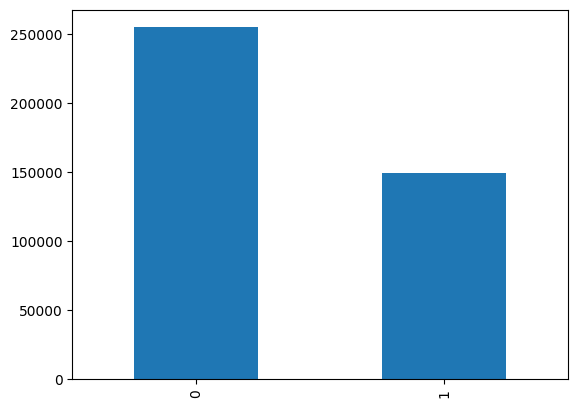

In [11]:
df['is_duplicate'].value_counts().plot(kind ='bar')

In [12]:
#find no of unique and repeated qs
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
qid.shape

(808580,)

In [13]:
print('no of unique questions:',np.unique(qid).shape[0])

no of unique questions: 537933


In [14]:
qid.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

In [15]:
df[df['qid1']==2561].head(3)

,id,qid1,qid2,question1,question2,is_duplicate
61253,61253,2561,4416,What's the easiest way to make money online?,What are some easy ways to make done extra mon...,1
91102,91102,2561,13144,What's the easiest way to make money online?,What is make money online?,1
138414,138414,2561,8037,What's the easiest way to make money online?,How do you make money online?,1


In [66]:
x= qid.value_counts()>1
print('no of repeated questions:',x.sum())

no of repeated questions: 1814


In [17]:
#alternate appraoch
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('no of unique questions:',qid.nunique())
x= qid.value_counts()>1
print('no of repeated questions:',x.sum())

no of unique questions: 537933
no of repeated questions: 111780


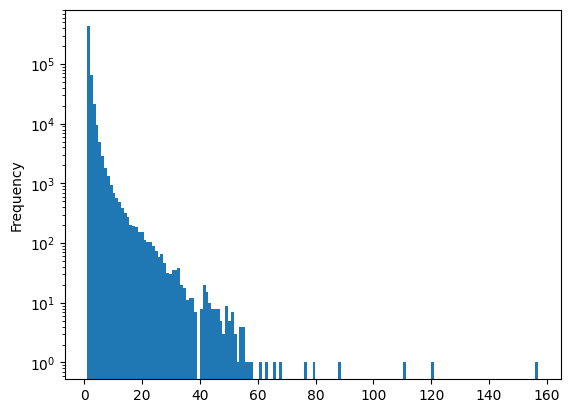

In [18]:
qid.value_counts().plot(kind = 'hist',bins = 160) # pandas builtin plotting functions
plt.yscale('log')

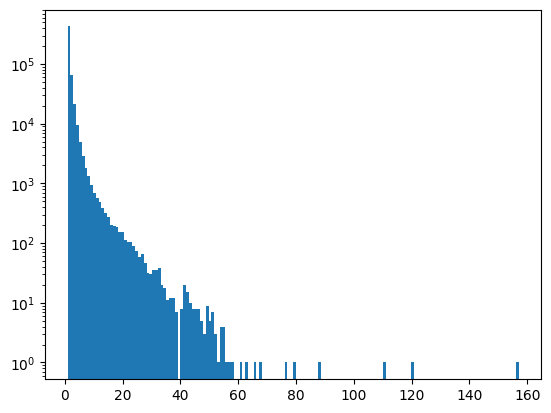

In [19]:
plt.hist(qid.value_counts().values,bins = 160) # uses matplotlib to plot the values not series
plt.yscale('log')

As the dataset is too big consider a random sample of 20000 rows for further modelling

In [20]:
new_df = df.sample(20000,random_state=2)

In [21]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [22]:
new_df.duplicated().sum()

0

#### Creating a base model 

In [67]:
ques_df = new_df[['question1','question2']]
ques_df.head(2)

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1'])+list(ques_df['question2'])
len(questions)
cv = CountVectorizer(max_features=2000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [25]:
temp_df = pd.concat([pd.DataFrame(q1_arr,index = ques_df.index),pd.DataFrame(q2_arr,index = ques_df.index)],axis =1 )
temp_df.shape

(20000, 4000)

In [69]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,is_duplicate
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = temp_df.iloc[:,:4000].values
y = temp_df['is_duplicate'].values

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=47)

In [72]:
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.73375

In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)
accuracy_score(y_test,y_predxgb)

0.71925

Here the base model gave an accuracy of around 70-75% without any preprocessing steps. 

#### Model#1

<AxesSubplot: >

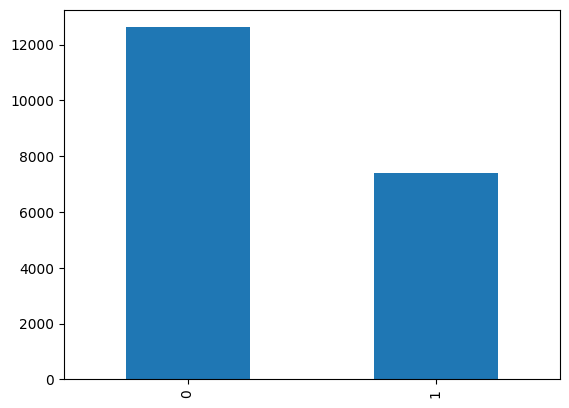

In [29]:
new_df['is_duplicate'].value_counts().plot(kind ='bar')

In [30]:
qid = pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('no of unique questions:',qid.nunique())
x= qid.value_counts()>1
print('no of repeated questions:',x.sum())

no of unique questions: 37702
no of repeated questions: 1814


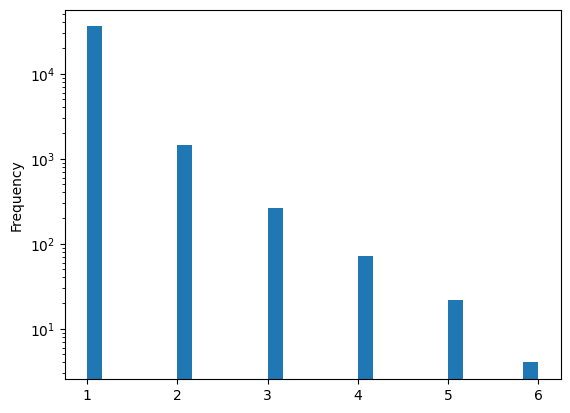

In [31]:
qid.value_counts().plot(kind = 'hist',bins = 30) # pandas builtin plotting functions
plt.yscale('log')

In [32]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

##### Feature Engineering

In [74]:
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.304348
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.058824


In [75]:
# no of characters in q1 and q2
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [76]:
# no of words in q1 and q2
new_df['q1_num_of_words'] = new_df['question1'].apply(lambda x:len(x.split(' ')))
new_df['q2_num_of_words'] = new_df['question2'].apply(lambda x:len(x.split(' ')))
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.304348
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.058824


In [77]:
# no of common words between q1 and q2
df['question2'] = df['question2'].fillna('')
df['question1'] = df['question1'].fillna('')

In [78]:
new_df['q2words'] = df['question2'].apply(lambda x : x.split(" "))
new_df['q1words'] = df['question1'].apply(lambda x : x.split(" "))

In [79]:
def common_words(row):
    q1words = set(row['q1words'])
    q2words = set(row['q2words'])
    return len(q1words.intersection(q2words)) 

In [80]:
new_df['common_words'] = new_df.apply(common_words,axis = 1)


In [81]:
new_df.drop(columns=['q2words', 'q1words'],inplace  =True)
new_df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333


In [82]:
# #alternate approach to find common words
# def common(row):
#     w1 = set(map(lambda x : x.lower().strip(),row['question1'].split(" ")))
#     w2 = set(map(lambda x : x.lower().strip(),row['question2'].split(" ")))
#     return len(w1 & w2)
# new_df['common'] = new_df.apply(common,axis = 1)

In [83]:
#example
list(map(lambda x : x.lower().strip(),"I am quite poor and I want to be very rich".split(" ")))

['i', 'am', 'quite', 'poor', 'and', 'i', 'want', 'to', 'be', 'very', 'rich']

In [84]:
#total no of unique words in q1 and q2
def total_unique(row):
    w1 = set(map(lambda x : x.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda x : x.lower().strip(),row['question2'].split(" ")))
    return len(w1)+len(w2)
new_df['total_words'] = new_df.apply(total_unique,axis = 1)

In [85]:
new_df['word_share'] =new_df['common_words']/new_df['total_words']

In [86]:
new_df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333


In [87]:
#Feature analysis
print ("characters in shortest sentence in q1:",new_df['q1_len'].min())
print ("characters in longest sentence in q1:",new_df['q1_len'].max())
print ("avg characters  in q1:",new_df['q1_len'].mean())

print ("characters in shortest sentence in q2:",new_df['q2_len'].min())
print ("characters in longest sentence in q2:",new_df['q2_len'].max())
print ("avg characters in q2:",new_df['q2_len'].mean())

characters in shortest sentence in q1: 2
characters in longest sentence in q1: 300
avg characters  in q1: 59.54825
characters in shortest sentence in q2: 7
characters in longest sentence in q2: 421
avg characters in q2: 60.17215


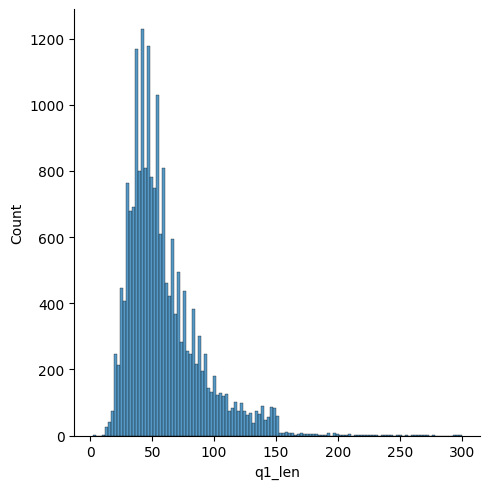

In [88]:
sns.displot(new_df['q1_len'])

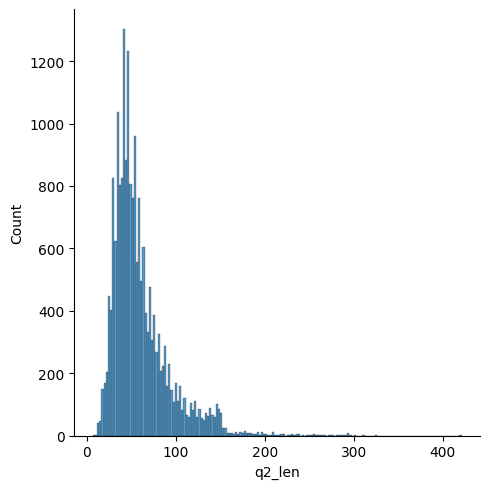

In [89]:
sns.displot(new_df['q2_len'])

In [90]:
print ("words in shortest sentence in q1:",new_df['q1_num_of_words'].min())
print ("words in longest sentence in q1:",new_df['q1_num_of_words'].max())
print ("avg words  in q1:",new_df['q1_num_of_words'].mean())

print ("words in shortest sentence in q2:",new_df['q2_num_of_words'].min())
print ("words in longest sentence in q2:",new_df['q2_num_of_words'].max())
print ("avg words in q2:",new_df['q2_num_of_words'].mean())

words in shortest sentence in q1: 1
words in longest sentence in q1: 63
avg words  in q1: 10.939
words in shortest sentence in q2: 1
words in longest sentence in q2: 72
avg words in q2: 11.2181


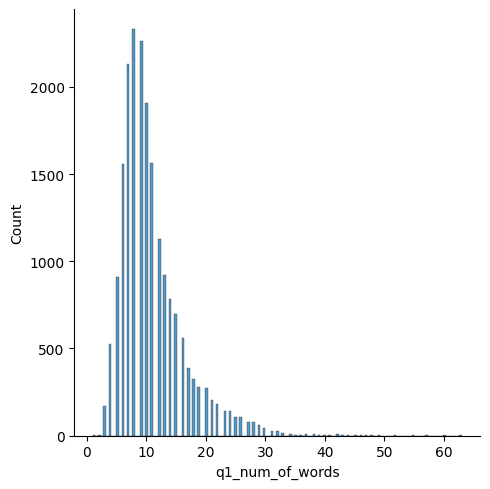

In [91]:
sns.displot(new_df['q1_num_of_words'])

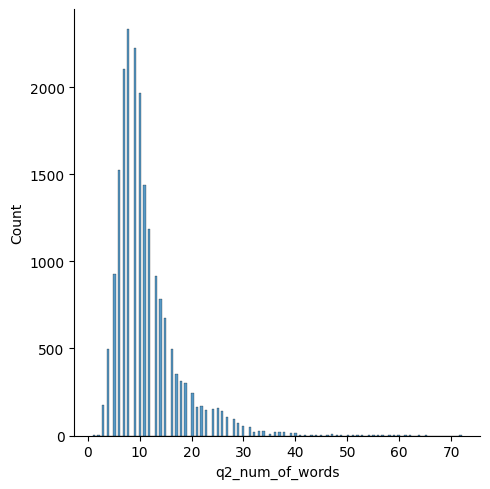

In [92]:
sns.displot(new_df['q2_num_of_words'])

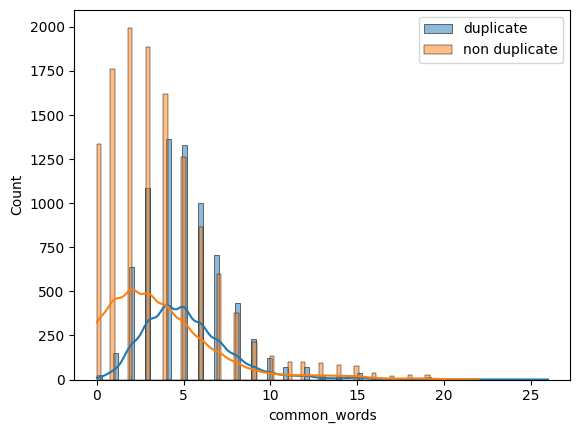

In [93]:
#common words
sns.histplot(new_df[new_df['is_duplicate']==1]['common_words'],kde = True,label = 'duplicate')
sns.histplot(new_df[new_df['is_duplicate']==0]['common_words'],kde = True,label = 'non duplicate')
plt.legend()
plt.show()

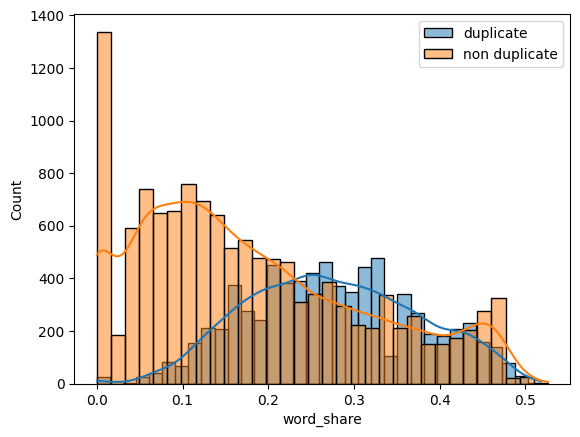

In [94]:
sns.histplot(new_df[new_df['is_duplicate']==1]['word_share'],kde = True,label = 'duplicate')
sns.histplot(new_df[new_df['is_duplicate']==0]['word_share'],kde = True,label = 'non duplicate')
plt.legend()
plt.show()

In [95]:
#creating required dataset
ques_df = new_df[['question1','question2']]
ques_df.head(3)

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...


In [96]:
new_df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.458333


In [97]:
final_df = new_df[['is_duplicate','q1_len','q2_len','q1_num_of_words','q2_num_of_words','common_words','total_words','word_share']]
final_df.head(2)

,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,1,76,77,12,12,11,24,0.458333
115086,0,49,57,12,15,7,23,0.304348


In [98]:
#apply bag of words
questions = list(ques_df['question1'])+list(ques_df['question2'])
cv = CountVectorizer(max_features=2000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df = pd.concat([pd.DataFrame(q1_arr,index = ques_df.index),pd.DataFrame(q2_arr,index = ques_df.index)],axis=1)
temp_df.shape

(20000, 4000)

In [99]:
final_df = pd.concat([temp_df,final_df],axis =1)
print(final_df.shape)
final_df.head(3)

(20000, 4008)


,0,1,2,3,4,5,6,7,8,9,...,1998,1999,is_duplicate,q1_len,q2_len,q1_num_of_words,q2_num_of_words,common_words,total_words,word_share
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,1,76,77,12,12,11,24,0.458333
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,49,57,12,15,7,23,0.304348
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,105,120,25,17,2,34,0.058824


In [100]:
X= final_df.drop(columns=['is_duplicate']).values
y = final_df['is_duplicate'].values

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=47)

In [102]:
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7535

In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)
accuracy_score(y_test,y_predxgb)

0.752

Some improvment in the model perfromance with the derived features